In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
from sqlalchemy import create_engine

In [19]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [20]:
cluster_numbers =[2,3,4,5,6]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std)) 

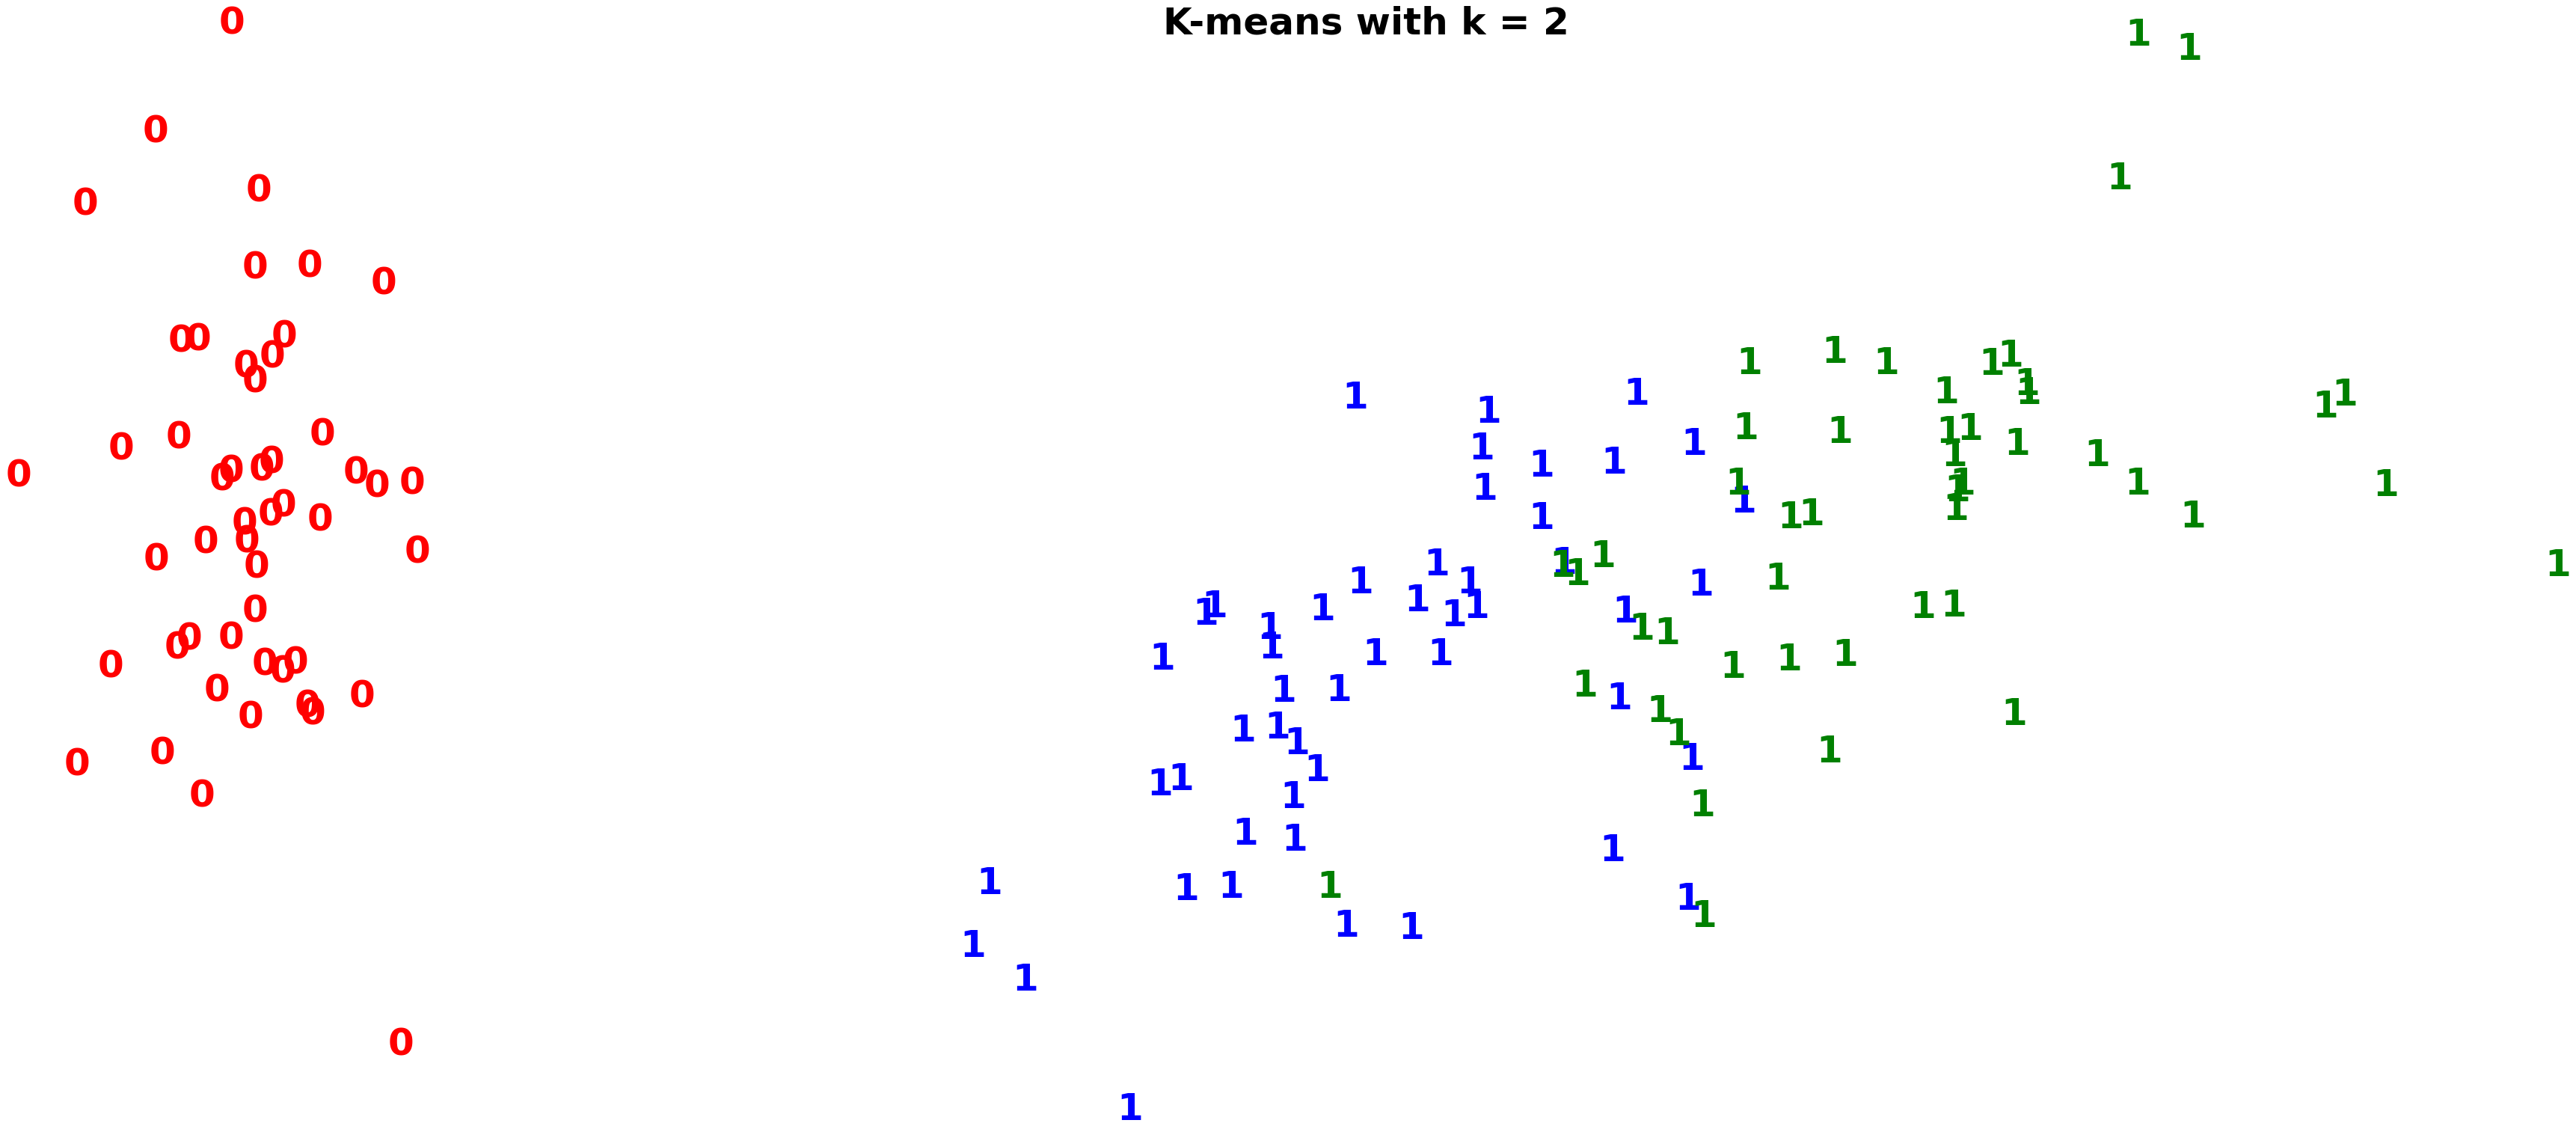

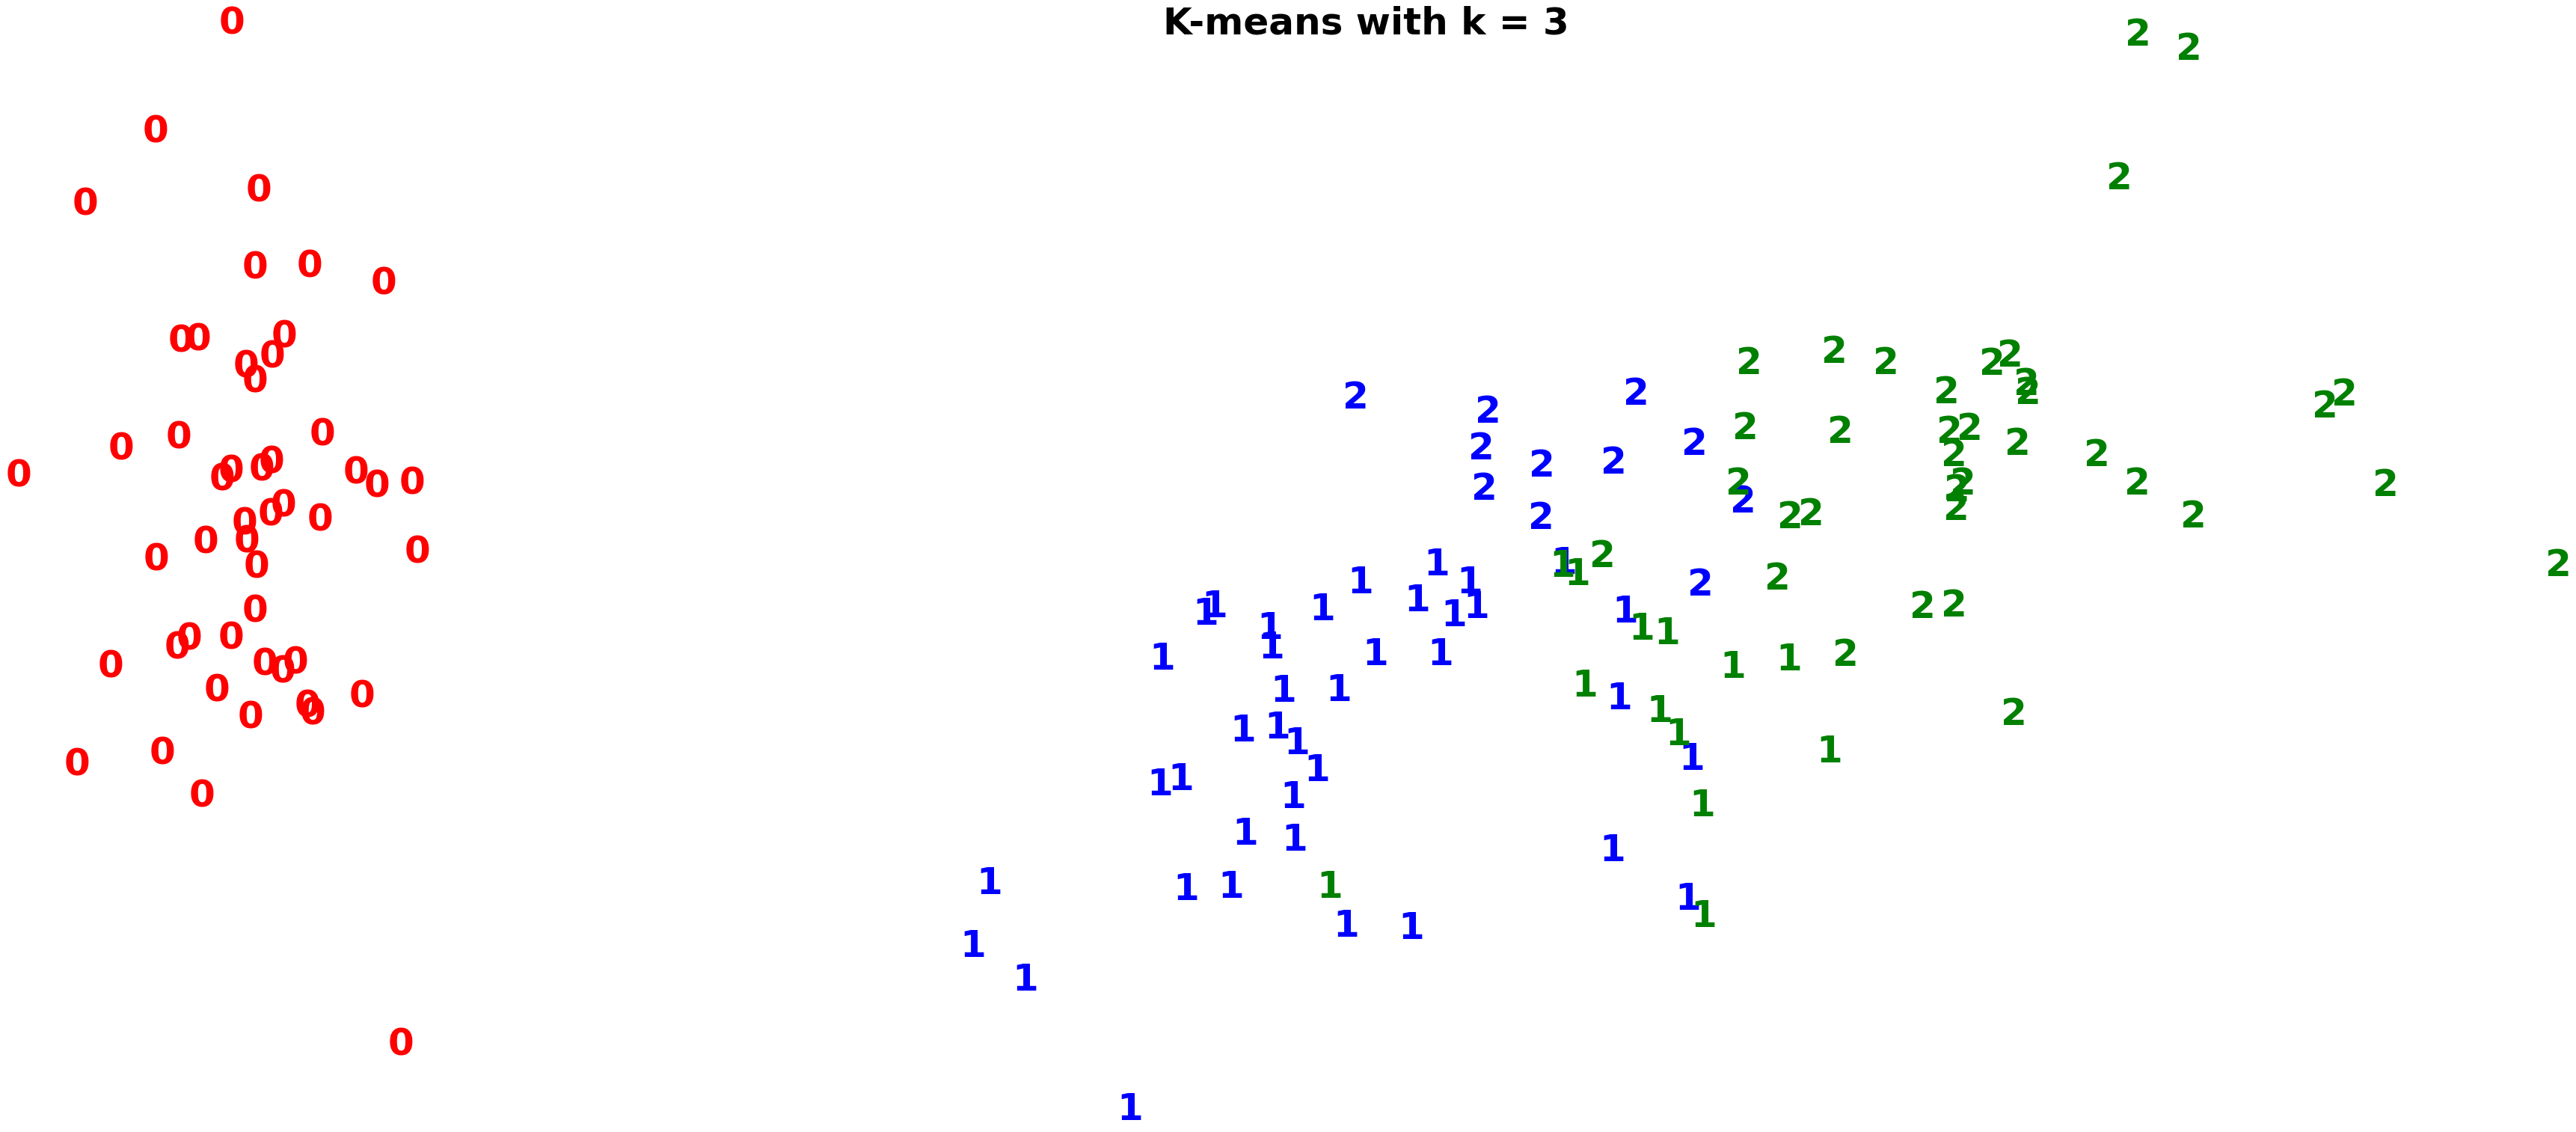

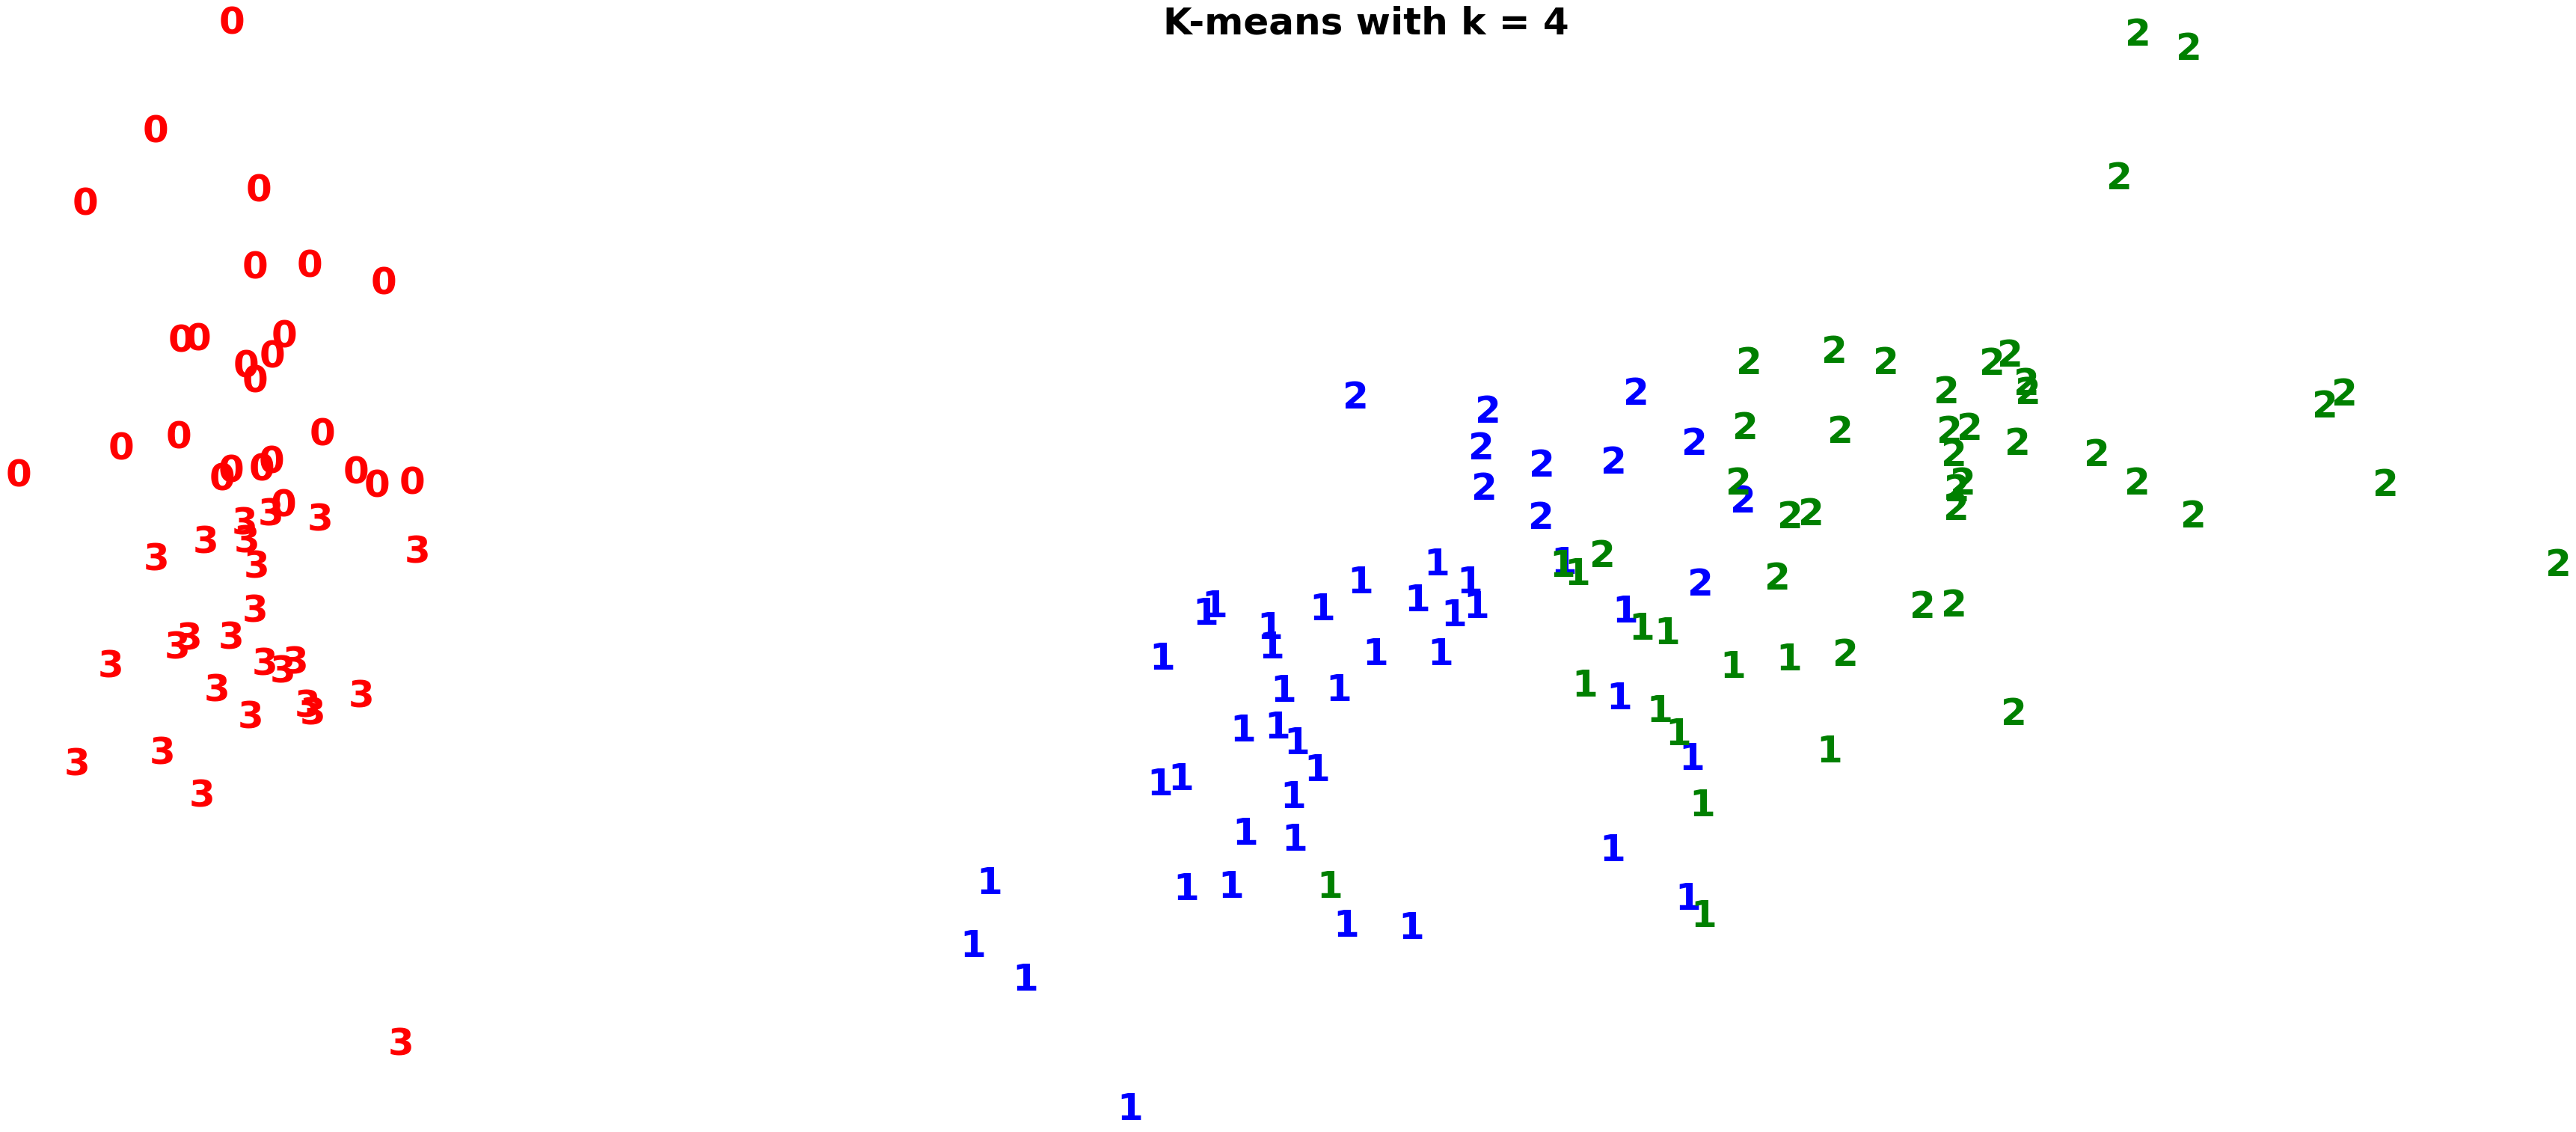

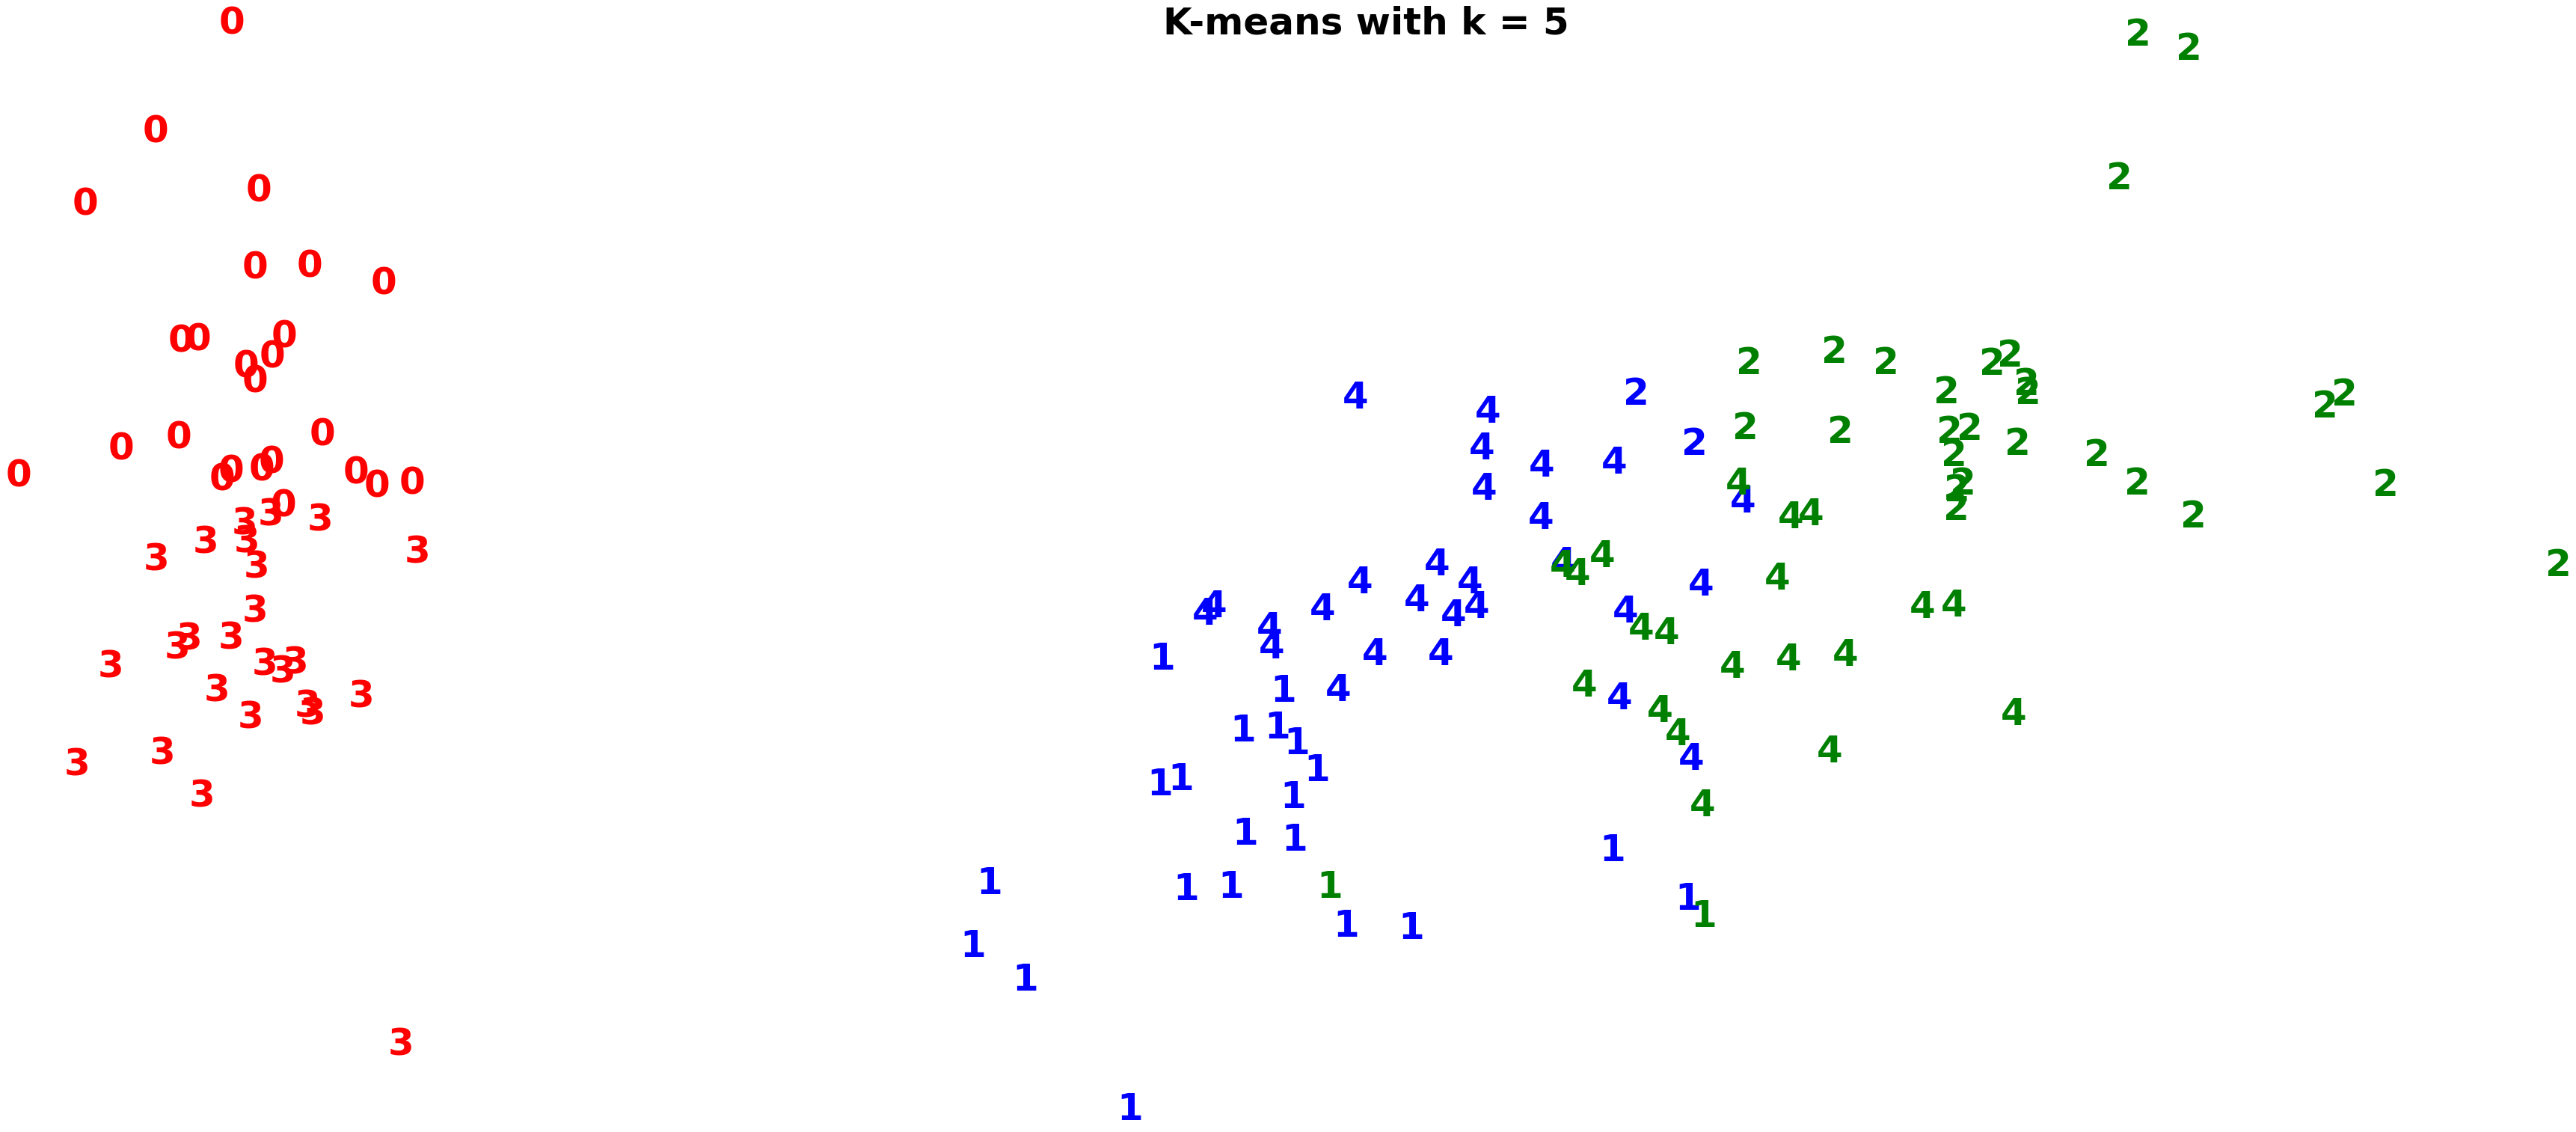

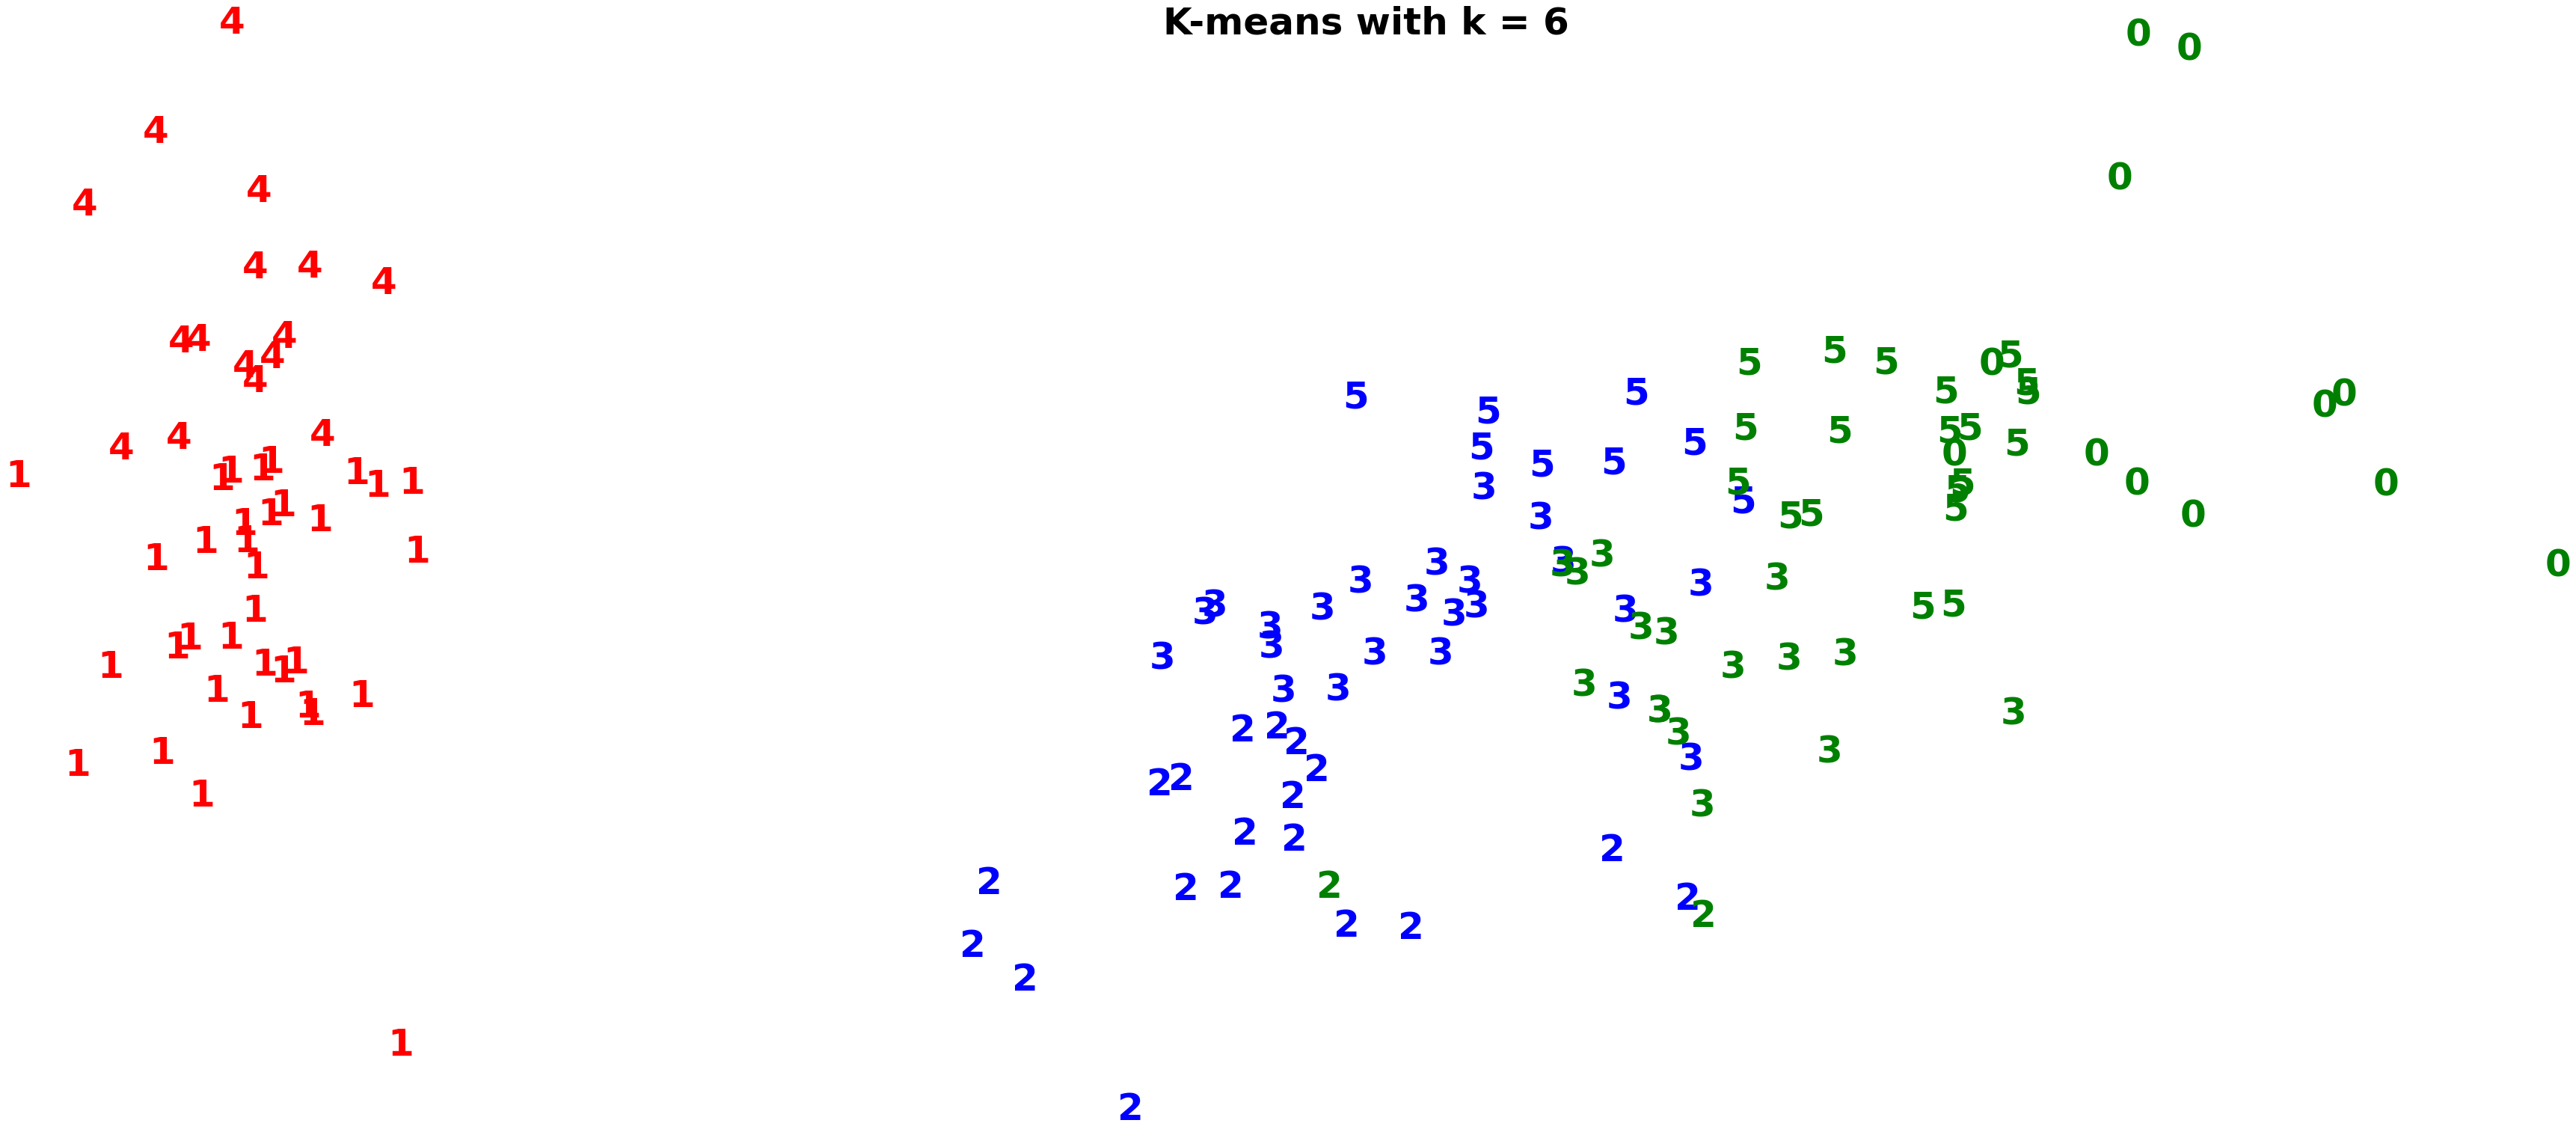

In [21]:
pca = PCA(n_components=2).fit_transform(X_std)

colours='rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [24]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [27]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

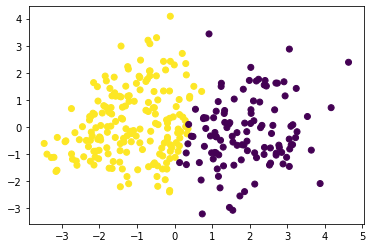

col_0    0    1
row_0          
0      101   13
1       38  151


In [30]:
sclaer = StandardScaler()
X_std = scaler.fit_transform(X)

X_pca = PCA(2).fit_transform(X_std)

y_pred=KMeans(n_clusters=2,random_state=123).fit_predict(X_std)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.show()

print(pd.crosstab(y_pred,y))